# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

sns.set_style('darkgrid')

# read the data

In [2]:
data=pd.read_csv("flights.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
data.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [7]:
data['month'].unique()

month={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

data['month']=data['month'].apply(lambda x:month[x])

<AxesSubplot:xlabel='year'>

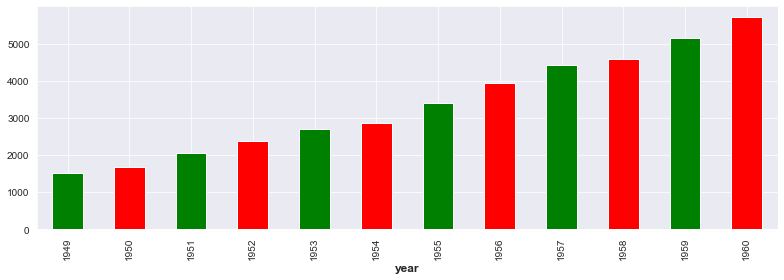

In [8]:
data.groupby('year')['passengers'].sum().plot(kind='bar',color=['green','red'])

# Feature Engineering

In [9]:
data['date']=data['year'].astype('str')+data['month'].astype('str')

In [10]:
data['date']=pd.to_datetime(data['date'],format="%Y%m")

In [11]:
data

,year,month,passengers,date
0,1949,1,112,1949-01-01
1,1949,2,118,1949-02-01
2,1949,3,132,1949-03-01
3,1949,4,129,1949-04-01
4,1949,5,121,1949-05-01
...,...,...,...,...
139,1960,8,606,1960-08-01
140,1960,9,508,1960-09-01
141,1960,10,461,1960-10-01
142,1960,11,390,1960-11-01


In [12]:
data.drop(['year','month'],axis=1,inplace=True)

In [13]:
data

,passengers,date
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01
...,...,...
139,606,1960-08-01
140,508,1960-09-01
141,461,1960-10-01
142,390,1960-11-01


In [14]:
data=data.set_index(['date'],drop=True)

Text(0, 0.5, 'Passengers')

<Figure size 720x576 with 0 Axes>

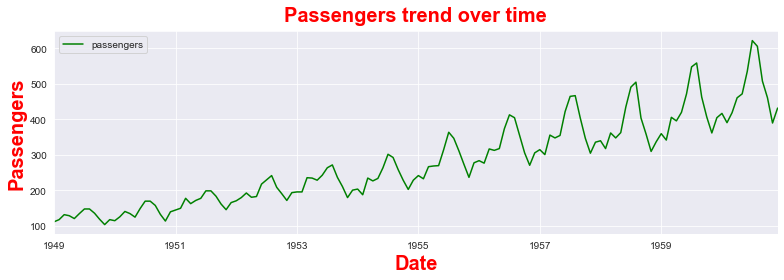

In [15]:
plt.figure(figsize=(10,8))
data.plot(c='green')

plt.title("Passengers trend over time",color='red',fontsize=20)
plt.xlabel('Date',color='red',fontsize=20)
plt.ylabel('Passengers',color='red',fontsize=20)


In [16]:
data=data.reset_index()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        144 non-null    datetime64[ns]
 1   passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [24]:
from darts.models import Prophet,ExponentialSmoothing,NBEATSModel
from darts import TimeSeries

In [26]:
series=TimeSeries.from_dataframe(data,'date','passengers')
model=Prophet()

In [31]:
est=ExponentialSmoothing()

In [20]:
len(series)-36

108

In [32]:
train=series[:-36]
val=series[-36:]

In [33]:
model.fit(train)

09:53:19 - cmdstanpy - INFO - Chain [1] start processing
09:53:19 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
prediction = model.predict(len(val))

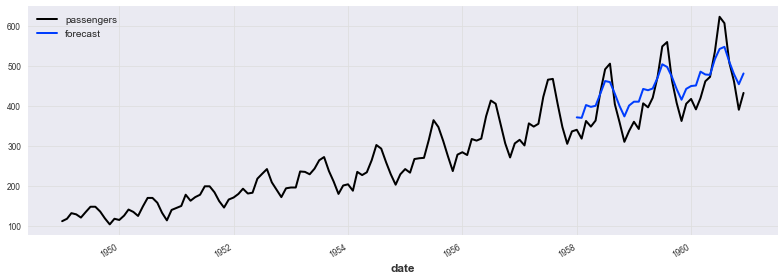

In [30]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()